## Image Recognition - CIFAR-10 Dataset and Convolutional Neural Networks

Author: Greg Strabel

This notebook builds a convolutional neural network for classification of the images in the CIFAR-10 dataset. The keras model is based on the example found [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split training data further into train and validation
train_frac = 0.8 # fraction of data for training
split_pnt = int(train_frac*x_train.shape[0])
x_train, x_val = x_train[0:split_pnt,:], x_train[split_pnt:,:]
y_train, y_val = y_train[0:split_pnt,:], y_train[split_pnt:,:]

num_classes = len(np.unique(y_train))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val,num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [2]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

The 10 classes in the CIFAR-10 dataset:




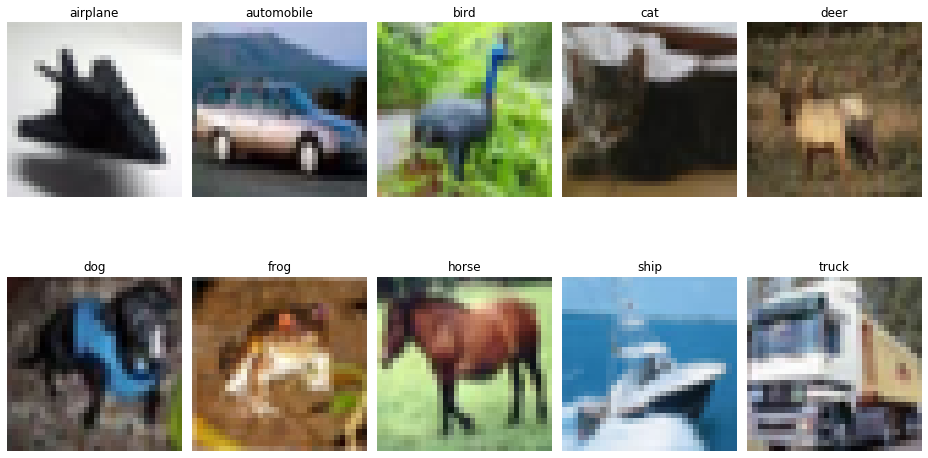

In [3]:
print('The 10 classes in the CIFAR-10 dataset:\n\n')
fig, axes = plt.subplots(ncols=5,nrows=2,figsize = (13,8))

for i in range(10):
    idx = np.argmax(y_train[:,i])
    ax = axes.ravel()[i]
    ax.imshow(x_train[idx]/255.)
    ax.axis('off')
    ax.set_title(labels[i])
plt.tight_layout()

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [5]:
model.fit(
    x_train/255.,
    y_train,
    batch_size = 100,
    epochs = 3,
    verbose = 1,
    validation_data = (x_val/255.,y_val)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 42s 1ms/sample - loss: 2.0242 - accuracy: 0.2404 - val_loss: 1.7628 - val_accuracy: 0.3727
Epoch 2/3
40000/40000 [==============================] - 41s 1ms/sample - loss: 1.7220 - accuracy: 0.3641 - val_loss: 1.5640 - val_accuracy: 0.4410
Epoch 3/3
40000/40000 [==============================] - 42s 1ms/sample - loss: 1.5637 - accuracy: 0.4294 - val_loss: 1.3796 - val_accuracy: 0.5044


In [6]:
cnn_pred = model.predict_classes(x_test/255.)

print(
    "\n\n\nClassification Report for Convolutional " + 
    "Neural Network Classifier: \n%s\n"
    % (metrics.classification_report(
        np.argmax(y_test, axis = 1),
        cnn_pred,
        target_names = labels
    )
      )
)




Classification Report for Convolutional Neural Network Classifier: 
              precision    recall  f1-score   support

    airplane       0.63      0.43      0.51      1000
  automobile       0.72      0.59      0.65      1000
        bird       0.37      0.31      0.34      1000
         cat       0.43      0.20      0.27      1000
        deer       0.41      0.37      0.39      1000
         dog       0.49      0.36      0.41      1000
        frog       0.49      0.73      0.58      1000
       horse       0.44      0.76      0.56      1000
        ship       0.57      0.64      0.60      1000
       truck       0.55      0.69      0.61      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.49     10000
weighted avg       0.51      0.51      0.49     10000




In [7]:
cwd = os.getcwd()
# Save the model
model.save(cwd + '\\CIFAR10KerasModel.h5')